In [2]:

from __future__ import print_function

import math
import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

In [18]:
pmf = thinkstats2.Pmf([1,2,2,3,5])
print("PMF: ",pmf)
print("Probability Associated with a value:", pmf.Prob(2))
print("Bracket operator also works:", pmf[2])
print("Incrementing probability:", pmf.Incr(2,0.2), pmf[2] )
print("Multiplying probability by a factor:", pmf.Mult(2,0.5), pmf[2])
print("Total: ", pmf.Total())
print("Nomalizing:", pmf.Normalize(), pmf.Total())


PMF:  Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})
Probability Associated with a value: 0.4
Bracket operator also works: 0.4
Incrementing probability: None 0.6000000000000001
Multiplying probability by a factor: None 0.30000000000000004
Total:  0.8999999999999999
Nomalizing: 0.8999999999999999 1.0


In [66]:
def MakeFrames():
    """Reads pregnancy data and partitions first babies and others.

    returns: DataFrames (all live births, first babies, others)
    """
    preg = nsfg.ReadFemPreg()

    live = preg[preg.outcome == 1]
    firsts = live[live.birthord == 1]
    others = live[live.birthord != 1]

    assert len(live) == 9148
    assert len(firsts) == 4413
    assert len(others) == 4735

    return live, firsts, others

def PlotDoublePmf (p1, p2, xlabel,ylabel,axis):
    #Init Graph
    width=0.45
    thinkplot.PrePlot(2, cols=2)
    thinkplot.Hist(p1, align="right", width=width)
    thinkplot.Hist(p2, align="left" , width=width)
    thinkplot.Config( xlabel = xlabel, ylabel=ylabel, axis=axis)

    thinkplot.PrePlot(2)
    thinkplot.SubPlot(2)
    thinkplot.Pmfs([p1,p2])
    thinkplot.Show(xlabel=xlabel, ylabel=ylabel, axis=axis)





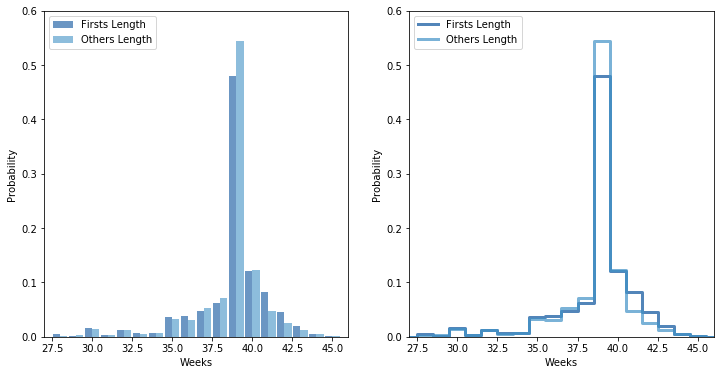

<Figure size 576x432 with 0 Axes>

In [67]:
live, firsts, others = MakeFrames()
first_pmf = thinkstats2.Pmf(firsts.prglngth, label = "Firsts Length")
other_pmf = thinkstats2.Pmf(others.prglngth, label = "Others Length")
PlotDoublePmf(first_pmf,other_pmf,"Weeks","Probability",[27,46,0,0.6])



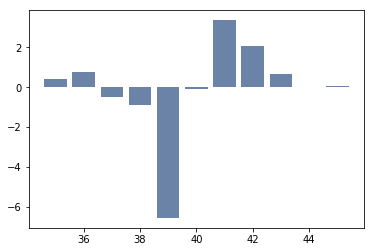

In [77]:
weeks = range(35,46)
diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = other_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)
thinkplot.Bar(weeks, diffs)

In [82]:
d = { 
    7:8,
    12:8,
    17:14,
    22:4,
    27:6,
    32:12,
    37:8,
    42:3,
    47:2
}
pmf = thinkstats2.Pmf(d, label='actual')
print ('mean %.2f' % pmf.Mean())

mean 23.69


In [130]:
def BiasPmf (pmf, label):
    new_pmf = pmf.Copy(label = label)
    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
    new_pmf.Normalize()
    return new_pmf

def UnbiasPmf (pmf, label): 
    new_pmf = pmf.Copy(label = label)
    for x, p in pmf.Items():
        new_pmf.Mult(x, 1.0/x)
    new_pmf.Normalize()
    return new_pmf
    

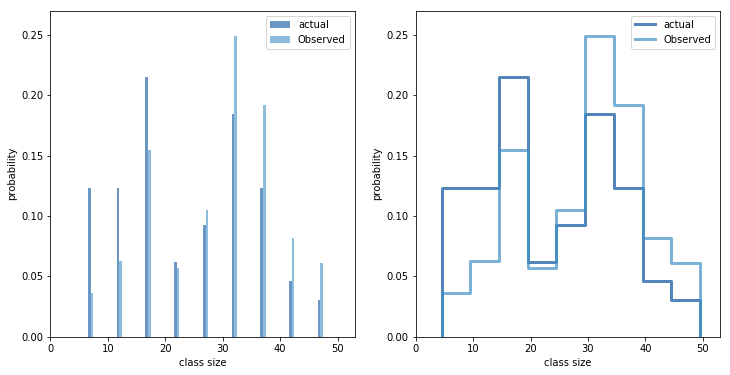

<Figure size 576x432 with 0 Axes>

In [129]:
biased_pmf = BiasPmf(pmf, label = "Observed")
PlotDoublePmf(pmf, biased_pmf, "class size", "probability", 
  [0,53, 0,0.27])

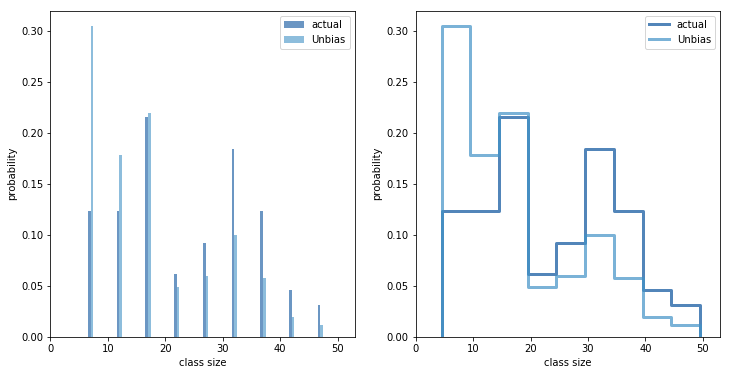

<Figure size 576x432 with 0 Axes>

In [135]:
unbiased_pmf = UnbiasPmf(pmf, label = "Unbias")
PlotDoublePmf(pmf, unbiased_pmf, "class size", "probability", 
  [0,53, 0,0.32])

In [150]:
import numpy as np
import pandas

print ("Array: ")
array = np.random.randn(4,2)
print(array)

print ("\nDataframe with columns")
columns = ['A', 'B']
df = pandas.DataFrame(array, columns=columns)
print (df)

print ("\nDataframe with index and columns")
index = ['a','b','c','d']
df = pandas.DataFrame(array, index=index, columns=columns)
print (df)



Array: 
[[-1.93126524 -0.79106295]
 [-0.67810546 -0.27792605]
 [ 0.17008912  1.54848165]
 [ 0.0503211   1.45710618]]

Dataframe with columns
          A         B
0 -1.931265 -0.791063
1 -0.678105 -0.277926
2  0.170089  1.548482
3  0.050321  1.457106

Dataframe with index and columns
          A         B
a -1.931265 -0.791063
b -0.678105 -0.277926
c  0.170089  1.548482
d  0.050321  1.457106


In [151]:
df ['A']

a   -1.931265
b   -0.678105
c    0.170089
d    0.050321
Name: A, dtype: float64

In [152]:
df.loc['a']

A   -1.931265
B   -0.791063
Name: a, dtype: float64

In [153]:
df.iloc[0]

A   -1.931265
B   -0.791063
Name: a, dtype: float64

In [154]:
indices = ['a','c']
df.loc[indices]

,A,B
a,-1.931265,-0.791063
c,0.170089,1.548482


In [155]:
df[0:2]

,A,B
a,-1.931265,-0.791063
b,-0.678105,-0.277926
